In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
from dq import snapshot_to_redshift,convert_run_to_cosmo_number,Cosmology
import matplotlib.pyplot as plt

In [2]:
run = 43
cosmology = Cosmology.from_run(run)

In [3]:
cosmology.cparams

[0.0214601, 0.128306, 0.8116979999999999, 3.27345, 0.959195, -1.114]

In [4]:
cosmo_number = convert_run_to_cosmo_number(run)

In [5]:
from dark_emulator import darkemu
emu = darkemu.base_class()
emu.set_cosmology(emu.cosmo.get_cosmology_predefined(cosmo_number)) 


initialize cosmo_class
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator
initialize xinl emulator


In [19]:
HALO_DATA_DIR = Path("/cosma6/data/dp004/dc-cues1/DarkQuest/")
r_xi =  np.loadtxt(HALO_DATA_DIR / "xi/separation.dat")
xi_hh_data = np.load(HALO_DATA_DIR / "xi/xihh.npy")
r_mask = (r_xi < 70.)
xi_hh_data = xi_hh_data[...,r_mask]
r_xi = r_xi[r_mask]

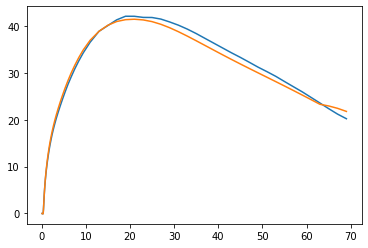

In [20]:
plt.plot(r_xi, r_xi**2*xi_hh_data[cosmo_number-1,-1,0])

plt.plot(r_xi, r_xi**2* emu.get_xiauto(r_xi, -2.5,-2.5, 0.))

In [21]:
multi_xi = pd.read_csv('/cosma7/data/dp004/dc-cues1/DarkQuest/dataframes/xi_multioutput.csv')

In [22]:
select_columns = [col for col in multi_xi.columns if col.startswith('xi_')]


In [23]:
filtered_multi_xi = multi_xi[(multi_xi['index'] == cosmo_number) & 
        (multi_xi['logn1'] == -2.5) &
         (multi_xi['logn2'] == -2.5) &
        (multi_xi['redshift'] == 0.0)]

In [28]:
filtered_multi_xi[select_columns].values[0]

array([-1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -9.92697497e-01, -9.04359134e-01, -3.25659463e-01,  1.46471348e+00,
        4.58362726e+00,  7.72570749e+00,  9.88372652e+00,  1.09103044e+01,
        1.11240670e+01,  1.07376107e+01,  9.94450894e+00,  9.08381657e+00,
        8.12533218e+00,  7.18992823e+00,  6.30226179e+00,  5.47551335e+00,
        4.74904820e+00,  4.08444887e+00,  3.49703318e+00,  2.98520291e+00,
        2.53315655e+00,  2.14516603e+00,  1.81390228e+00,  1.52901627e+00,
        1.28953206e+00,  1.08805718e+00,  9.18202961e-01,  7.74742578e-01,
        6.51477015e-01,  5.47807007e-01,  4.59412900e-01,  3.84459952e-01,
        3.01893108e-01,  2.29899033e-01,  1.78108845e-01,  1.42881011e-01,
        1.16514563e-01,  9.53574291e-02,  7.90470194e-02,  6.68684651e-02,
        5.68688699e-02,  4.85621528e-02,  4.17761463e-02,  3.61006095e-02,
        3.13222560e-02,  

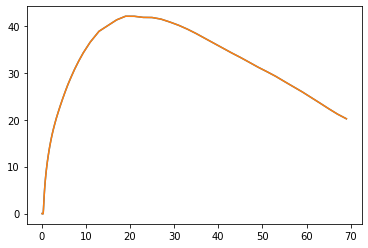

In [29]:
plt.plot(r_xi, r_xi**2*xi_hh_data[cosmo_number-1,-1,0])

plt.plot(r_xi, r_xi**2*filtered_multi_xi[select_columns].values[0])

In [30]:
xi = pd.read_csv('/cosma7/data/dp004/dc-cues1/DarkQuest/dataframes/xi.csv')

In [31]:
filtered_xi = xi[(xi['index'] == cosmo_number) & 
        (xi['logn1'] == -2.5) &
         (xi['logn2'] == -2.5) &
        (xi['redshift'] == 0.0)]

In [32]:
filtered_xi

,index,wb,wc,Ol,tau,lnAs,ns,w,s8,Om,h,xi,r,logn_bin,logn1,logn2,redshift
4342520,83,0.02146,0.128306,0.811698,0.073865,3.27345,0.959195,-1.114,1.04797,0.188302,0.893728,-1.000000,0.105925,0,-2.5,-2.5,0.0
4342521,83,0.02146,0.128306,0.811698,0.073865,3.27345,0.959195,-1.114,1.04797,0.188302,0.893728,-1.000000,0.118850,0,-2.5,-2.5,0.0
4342522,83,0.02146,0.128306,0.811698,0.073865,3.27345,0.959195,-1.114,1.04797,0.188302,0.893728,-1.000000,0.133352,0,-2.5,-2.5,0.0
4342523,83,0.02146,0.128306,0.811698,0.073865,3.27345,0.959195,-1.114,1.04797,0.188302,0.893728,-1.000000,0.149624,0,-2.5,-2.5,0.0
4342524,83,0.02146,0.128306,0.811698,0.073865,3.27345,0.959195,-1.114,1.04797,0.188302,0.893728,-1.000000,0.167880,0,-2.5,-2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4342585,83,0.02146,0.128306,0.811698,0.073865,3.27345,0.959195,-1.114,1.04797,0.188302,0.893728,0.006651,61.000000,0,-2.5,-2.5,0.0
4342586,83,0.02146,0.128306,0.811698,0.073865,3.27345,0.959195,-1.114,1.04797,0.188302,0.893728,0.005936,63.000000,0,-2.5,-2.5,0.0
4342587,83,0.02146,0.128306,0.811698,0.073865,3.27345,0.959195,-1.114,1.04797,0.188302,0.893728,0.005289,65.000000,0,-2.5,-2.5,0.0
4342588,83,0.02146,0.128306,0.811698,0.073865,3.27345,0.959195,-1.114,1.04797,0.188302,0.893728,0.004720,67.000000,0,-2.5,-2.5,0.0


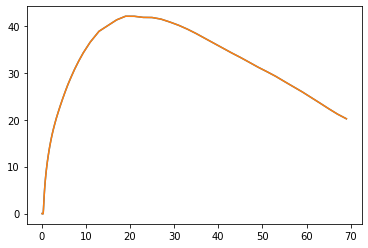

In [33]:
plt.plot(r_xi, r_xi**2*xi_hh_data[cosmo_number-1,-1,0])

plt.plot(r_xi, r_xi**2*filtered_xi['xi'].values)